In [ ]:
#!pip install opencv-python matplotlib seaborn pandas numpy scikit-learn pillow

In [3]:
import os
import glob

# Ścieżka główna do folderu DATA
data_path = 'DATA\\'

# Stworzenie listy dla zbiorów Train, Test, Valid
train_path = os.path.join(data_path, 'Train_Test_Valid', 'Train')
test_path = os.path.join(data_path, 'Train_Test_Valid', 'test')
valid_path = os.path.join(data_path, 'Train_Test_Valid', 'valid')

# Lista klas (typów meduz)
classes = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 
           'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

# Przygotowanie listy plików dla każdej klasy i zbioru (Train, Test, Valid)
train_files = {cls: glob.glob(os.path.join(train_path, cls, '*.jpg')) for cls in classes}
test_files = {cls: glob.glob(os.path.join(test_path, cls, '*.jpg')) for cls in classes}
valid_files = {cls: glob.glob(os.path.join(valid_path, cls, '*.jpg')) for cls in classes}

# Zestawienie plików
print("Train files:", train_files)
print("Test files:", test_files)
print("Valid files:", valid_files)


Train files: {'barrel_jellyfish': ['DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\02.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\03.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\04.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\05.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\06.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\07.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\10.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\11.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\12.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\13.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\14.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\15.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\17.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\18.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\20.jpg', 'DATA\\Train_Test_Valid\\Train\\barrel_jellyfish\\21.jpg', 'DATA\\Train_Test_Val

Tworzenie histogramu dla klasy: barrel_jellyfish


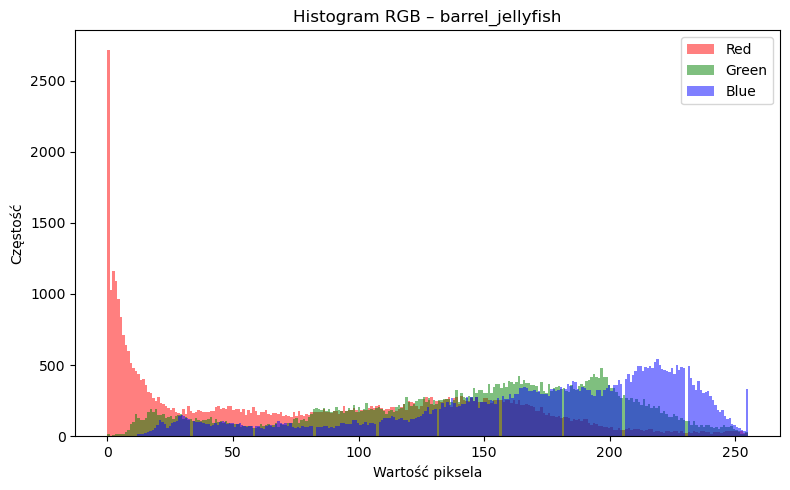

Tworzenie histogramu dla klasy: blue_jellyfish


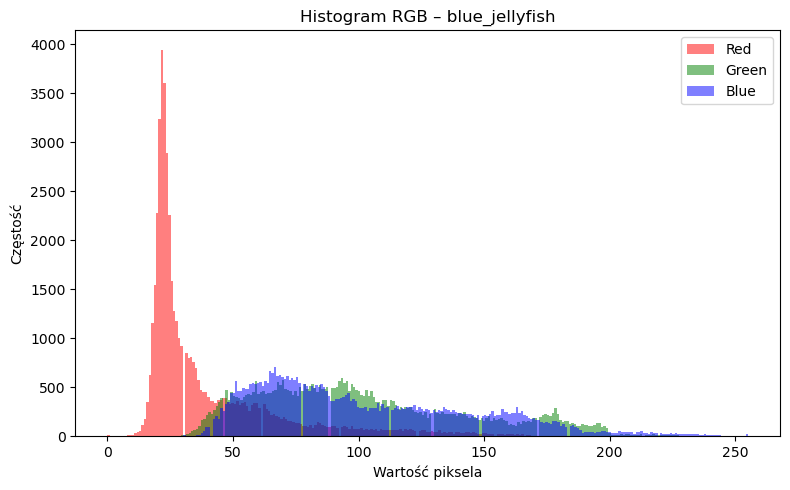

Tworzenie histogramu dla klasy: compass_jellyfish


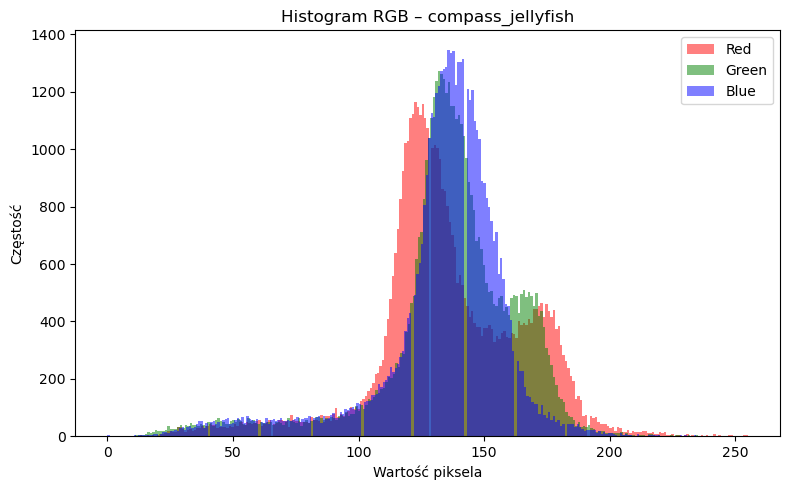

Tworzenie histogramu dla klasy: lions_mane_jellyfish


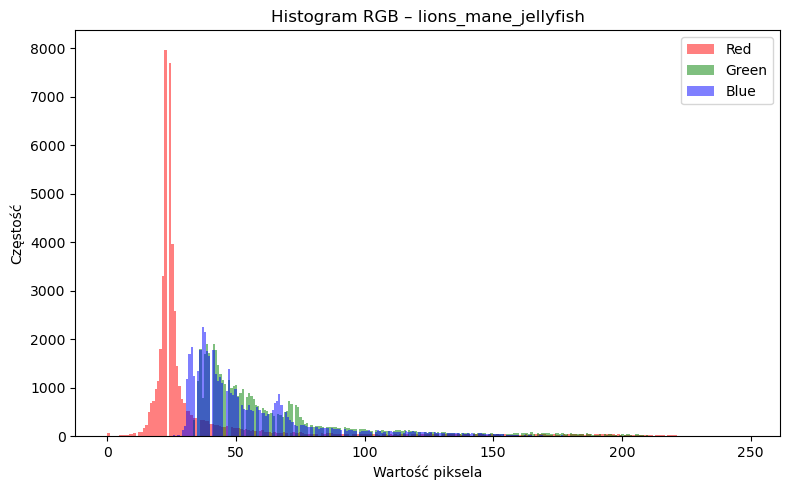

Tworzenie histogramu dla klasy: mauve_stinger_jellyfish


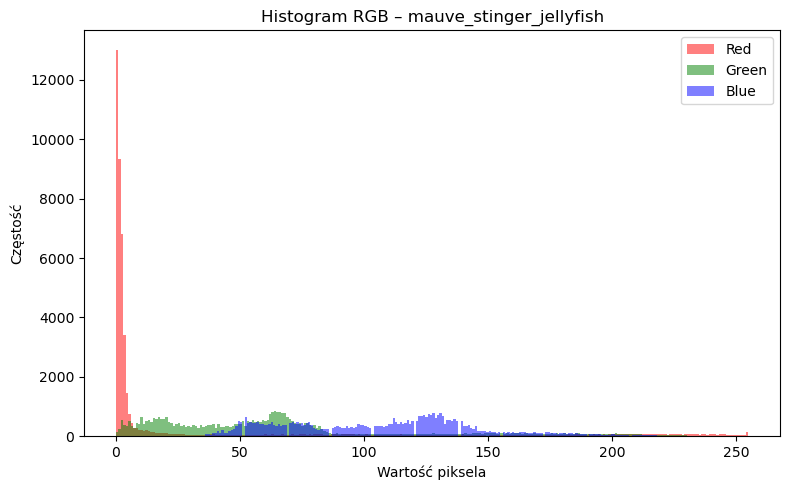

Tworzenie histogramu dla klasy: Moon_jellyfish


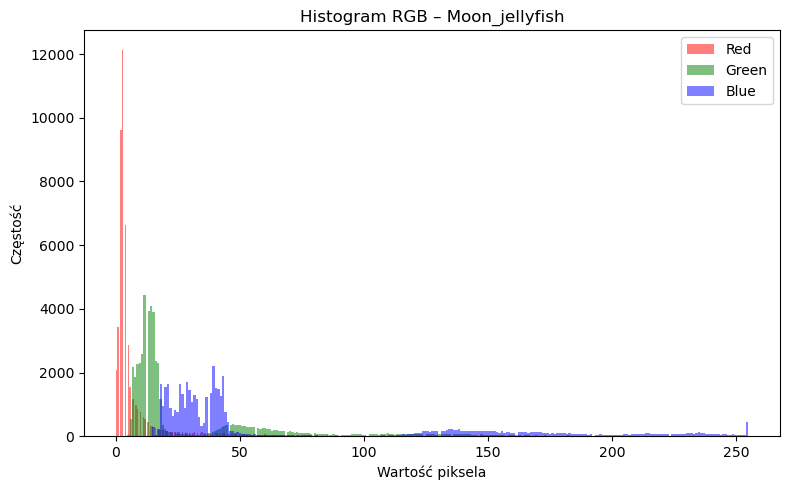

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Ścieżka do katalogu treningowego
train_path = 'DATA/Train_Test_Valid/Train'

# Lista klas (folderów)
classes = [cls for cls in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, cls))]

# Funkcja: rysuj histogram RGB dla jednego obrazu
def plot_rgb_histogram(image_path, class_name):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Nie można załadować obrazu: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(image)
    
    plt.figure(figsize=(8, 5))
    plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
    plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
    plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    plt.title(f'Histogram RGB – {class_name}')
    plt.xlabel('Wartość piksela')
    plt.ylabel('Częstość')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Przechodzimy przez wszystkie klasy
for class_name in classes:
    class_folder = os.path.join(train_path, class_name)
    image_paths = glob.glob(os.path.join(class_folder, '*.jpg'))
    
    if not image_paths:
        print(f"Brak obrazów dla klasy {class_name}")
        continue

    # Wybieramy pierwszy obraz z każdej klasy do analizy
    sample_image_path = image_paths[0]
    print(f"Tworzenie histogramu dla klasy: {class_name}")
    plot_rgb_histogram(sample_image_path, class_name)


In [9]:
def image_sizes(image_paths):
    sizes = []
    for path in image_paths:
        img = cv2.imread(path)
        sizes.append(img.shape[:2])  # (height, width)
    return sizes

# Przykładowe rozmiary dla klasy "barrel_jellyfish"
sizes_barrel_jellyfish = image_sizes(train_files['barrel_jellyfish'])
print("Rozmiary obrazów dla Barrel Jellyfish:", sizes_barrel_jellyfish)


Rozmiary obrazów dla Barrel Jellyfish: [(224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (179, 179), (224, 224), (179, 179), (179, 179), (224, 224), (224, 224), (224, 224), (224, 224), (179, 179), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (179, 179), (179, 179), (224, 224), (179, 179), (224, 224), (224, 224), (179, 179), (179, 179), (179, 179), (224, 224), (224, 224), (179, 179), (224, 224), (224, 224), (224, 224), (179, 179), (224, 224), (179, 179), (224, 224), (179, 179), (179, 179), (224, 224), 

In [11]:
# Liczba zdjęć w każdym zbiorze
def count_images_in_class(files_dict):
    count_dict = {cls: len(paths) for cls, paths in files_dict.items()}
    return count_dict

train_counts = count_images_in_class(train_files)
test_counts = count_images_in_class(test_files)
valid_counts = count_images_in_class(valid_files)

print("Liczba zdjęć w zbiorze treningowym:", train_counts)
print("Liczba zdjęć w zbiorze testowym:", test_counts)
print("Liczba zdjęć w zbiorze walidacyjnym:", valid_counts)


Liczba zdjęć w zbiorze treningowym: {'barrel_jellyfish': 146, 'blue_jellyfish': 148, 'compass_jellyfish': 144, 'lions_mane_jellyfish': 144, 'mauve_stinger_jellyfish': 150, 'Moon_jellyfish': 150}
Liczba zdjęć w zbiorze testowym: {'barrel_jellyfish': 5, 'blue_jellyfish': 5, 'compass_jellyfish': 6, 'lions_mane_jellyfish': 8, 'mauve_stinger_jellyfish': 7, 'Moon_jellyfish': 6}
Liczba zdjęć w zbiorze walidacyjnym: {'barrel_jellyfish': 5, 'blue_jellyfish': 5, 'compass_jellyfish': 7, 'lions_mane_jellyfish': 7, 'mauve_stinger_jellyfish': 7, 'Moon_jellyfish': 6}


Przetwarzanie gatunków: 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


,avg_width,avg_height,avg_brightness,avg_unique_colors,hue_hist,avg_image
barrel_jellyfish,207.972603,207.972603,111.023616,6783.013699,"[[1277.0821917808219], [100.23287671232876], [...","[[[61, 111, 130], [63, 113, 132], [62, 113, 13..."
blue_jellyfish,211.22973,211.22973,84.304905,5473.236486,"[[3698.7905405405404], [8.10135135135135], [11...","[[[72, 99, 114], [71, 98, 114], [71, 97, 113],..."
compass_jellyfish,211.8125,211.8125,106.041397,6379.458333,"[[610.8333333333334], [75.0], [87.680555555555...","[[[72, 123, 140], [73, 123, 140], [73, 123, 14..."
lions_mane_jellyfish,211.1875,211.1875,77.460661,6368.451389,"[[1374.548611111111], [247.54166666666666], [2...","[[[38, 81, 85], [38, 82, 86], [39, 83, 86], [4..."
mauve_stinger_jellyfish,211.4,211.4,87.438584,6265.313333,"[[3120.4266666666667], [132.53333333333333], [...","[[[50, 85, 99], [50, 85, 99], [50, 85, 99], [5..."
Moon_jellyfish,209.9,209.9,54.450675,5162.546667,"[[7170.84], [22.80666666666667], [21.786666666...","[[[19, 31, 57], [20, 32, 58], [20, 32, 58], [2..."


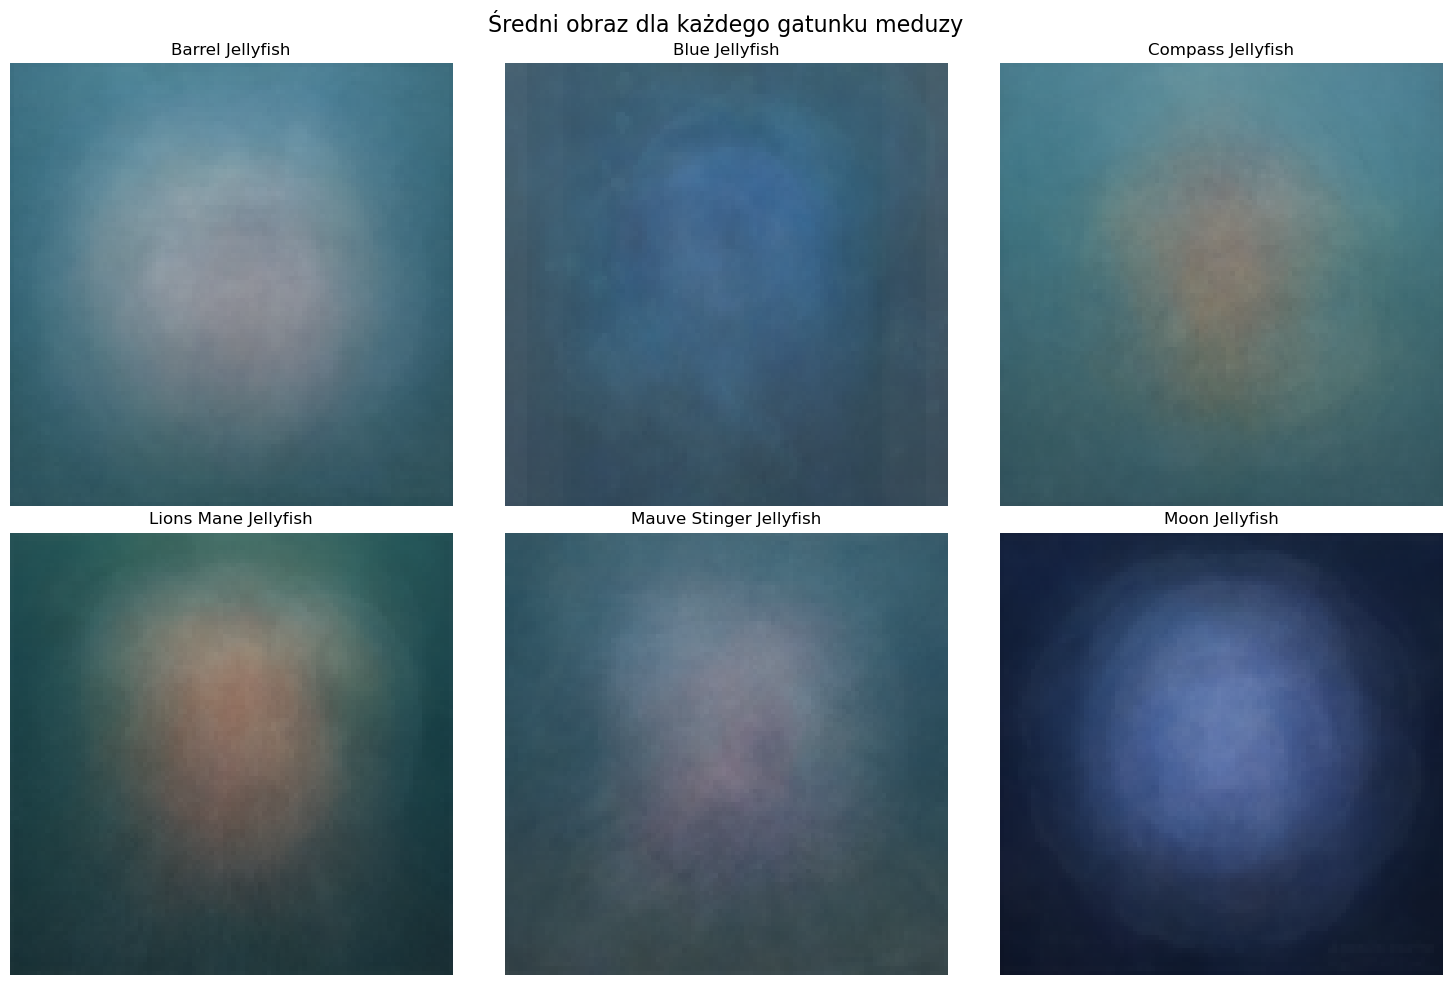

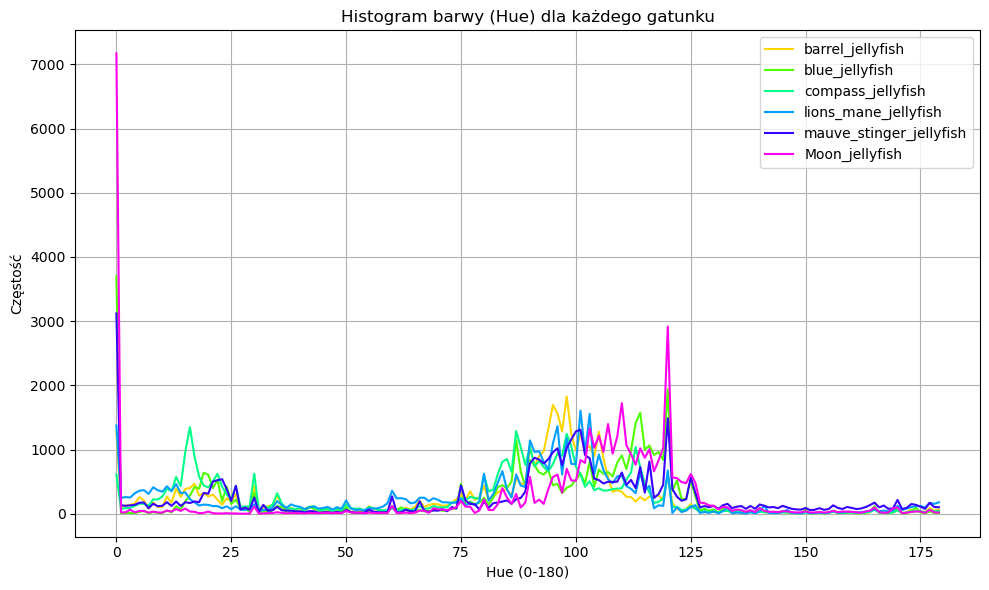


Generowanie koła barw (Hue)...


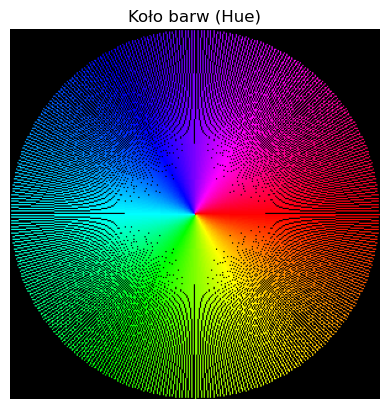

In [21]:
import os
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.cluster import KMeans
from PIL import Image
from tqdm import tqdm

# 📁 Ścieżka do folderu treningowego
base_path = Path("DATA/Train_Test_Valid/Train")

# 🪼 Gatunki meduz (foldery)
species_dirs = [d for d in base_path.iterdir() if d.is_dir()]
species_names = [d.name for d in species_dirs]

# 📊 Tu będziemy trzymać metryki
metrics = defaultdict(dict)

# 🎨 Ustawienia kolorów do wykresów
colors = sns.color_palette("hsv", len(species_names))

# 🔁 Przetwarzamy każdy gatunek
for species_dir in tqdm(species_dirs, desc="Przetwarzanie gatunków"):
    species = species_dir.name
    image_paths = list(species_dir.glob("*.jpg"))
    
    widths, heights, brightness_vals = [], [], []
    hsv_hist_total = np.zeros((180, 1))  # tylko hue do histogramu
    avg_image = None
    unique_colors = []

    for path in image_paths:
        img = cv2.imread(str(path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)
        brightness_vals.append(np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

        # HSV histogram
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        hist_hue = cv2.calcHist([hsv], [0], None, [180], [0, 180])
        hsv_hist_total += hist_hue

        # Średni obraz
        img = cv2.resize(img, (100, 100))  # ujednolicenie rozmiaru
        if avg_image is None:
            avg_image = np.zeros_like(img, dtype=np.float64)
        avg_image += img / len(image_paths)

        # Liczba unikalnych kolorów
        unique_colors.append(len(np.unique(img.reshape(-1, 3), axis=0)))

    # 💾 Zapisujemy metryki
    metrics[species]['avg_width'] = np.mean(widths)
    metrics[species]['avg_height'] = np.mean(heights)
    metrics[species]['avg_brightness'] = np.mean(brightness_vals)
    metrics[species]['avg_unique_colors'] = np.mean(unique_colors)
    metrics[species]['hue_hist'] = hsv_hist_total / len(image_paths)
    metrics[species]['avg_image'] = avg_image.astype(np.uint8)

# 📋 Wyświetlamy tabelkę z metrykami
import pandas as pd
df_metrics = pd.DataFrame(metrics).T
display(df_metrics)

# 🎨 1. Średni obraz dla każdego gatunku
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for idx, species in enumerate(species_names):
    axes[idx].imshow(metrics[species]['avg_image'])
    axes[idx].axis('off')
    axes[idx].set_title(species.replace("_", " ").title())
fig.suptitle("Średni obraz dla każdego gatunku meduzy", fontsize=16)
plt.tight_layout()
plt.show()

# 📈 2. Histogram Hue (HSV) dla każdego gatunku
plt.figure(figsize=(10, 6))
for idx, species in enumerate(species_names):
    plt.plot(metrics[species]['hue_hist'], label=species, color=colors[idx])
plt.title("Histogram barwy (Hue) dla każdego gatunku")
plt.xlabel("Hue (0-180)")
plt.ylabel("Częstość")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\nGenerowanie koła barw (Hue)...")

def draw_hue_circle():
    hsv_circle = np.zeros((300, 300, 3), dtype=np.uint8)
    for angle in range(360):
        for r in range(150):
            x = int(150 + r * np.cos(np.radians(angle)))
            y = int(150 + r * np.sin(np.radians(angle)))
            hsv_circle[y, x] = [angle // 2, 255, 255]  # OpenCV hue: 0–179
    rgb_circle = cv2.cvtColor(hsv_circle, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_circle)
    plt.axis('off')
    plt.title("Koło barw (Hue)")
    plt.show()

draw_hue_circle()


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ścieżka do folderu treningowego
DATA_DIR = 'DATA/Train_Test_Valid/Train'

# Lista folderów = etykiety gatunków
species_folders = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print(f"Znaleziono {len(species_folders)} gatunków meduz: {species_folders}")

# Liczba zdjęć w każdym gatunku
species_image_counts = {}
for species in species_folders:
    species_dir = os.path.join(DATA_DIR, species)
    images = os.listdir(species_dir)
    species_image_counts[species] = len(images)

print("\nLiczba zdjęć w każdym gatunku:")
for species, count in species_image_counts.items():
    print(f"{species}: {count} zdjęć")


Znaleziono 6 gatunków meduz: ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']

Liczba zdjęć w każdym gatunku:
barrel_jellyfish: 150 zdjęć
blue_jellyfish: 150 zdjęć
compass_jellyfish: 150 zdjęć
lions_mane_jellyfish: 150 zdjęć
mauve_stinger_jellyfish: 150 zdjęć
Moon_jellyfish: 150 zdjęć



Wyświetlanie przykładowych obrazków z każdego gatunku meduzy...


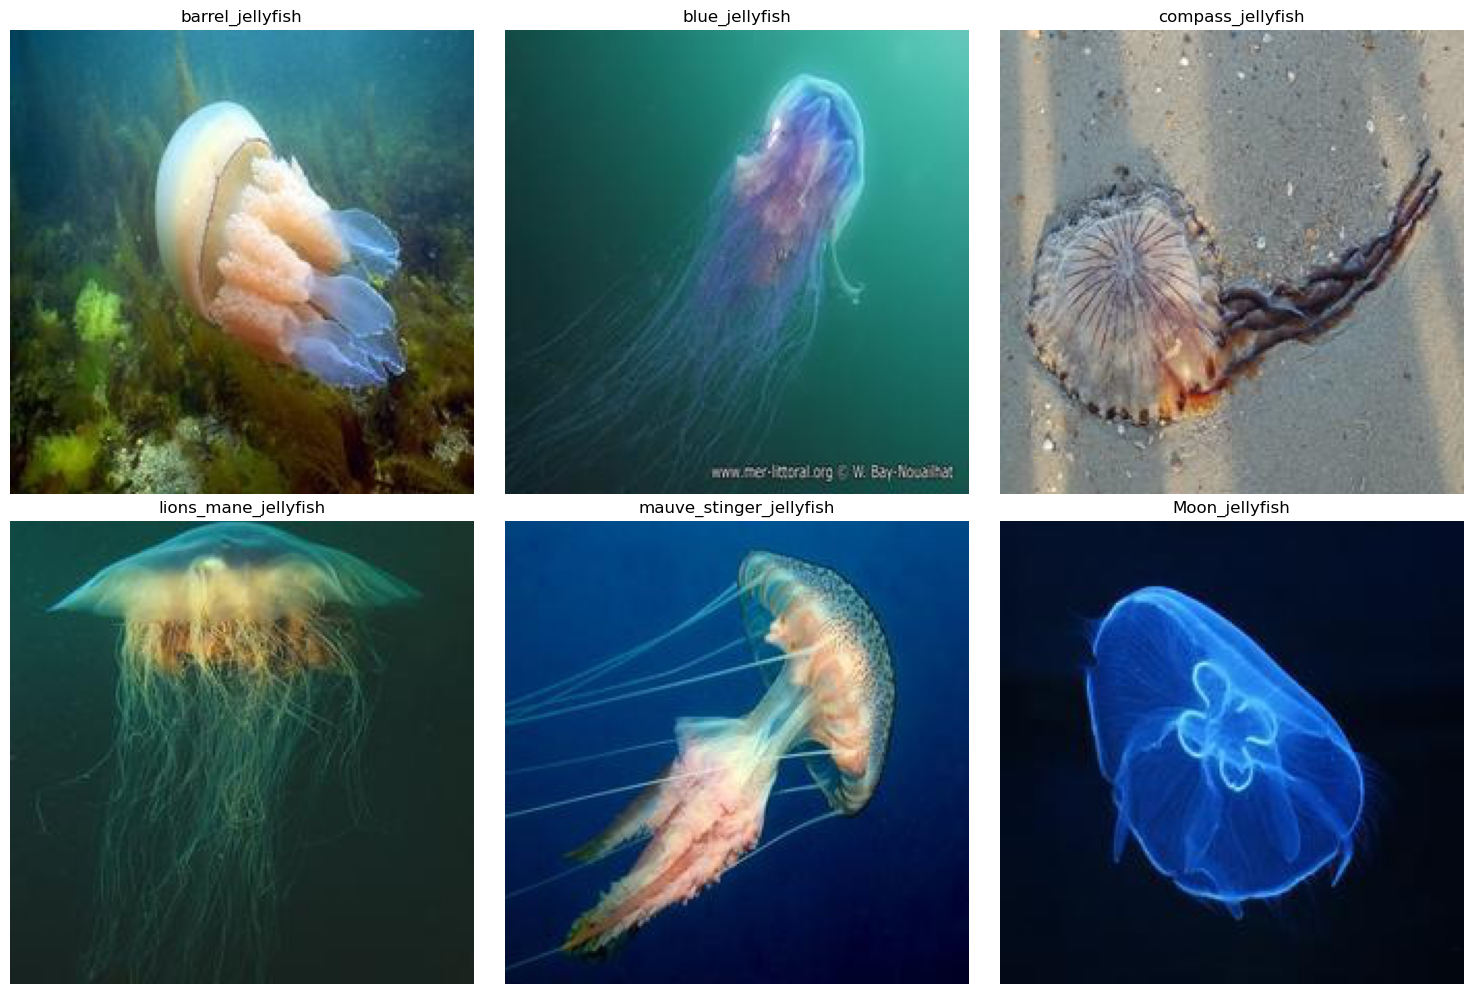

In [16]:
def show_sample_images():
    print("\nWyświetlanie przykładowych obrazków z każdego gatunku meduzy...")
    plt.figure(figsize=(15, 10))
    for i, species in enumerate(species_folders):
        species_dir = os.path.join(DATA_DIR, species)
        sample_file = os.listdir(species_dir)[0]
        img = Image.open(os.path.join(species_dir, sample_file))
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(species)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images()


In [17]:
def extract_features(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (100, 100))  # ujednolicenie rozmiaru
    avg_color = img_resized.mean(axis=(0, 1))  # średnie RGB
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    avg_brightness = gray.mean()
    return [*avg_color, avg_brightness]

print("\nEkstrakcja cech z obrazów...")
X = []
y = []

for species in species_folders:
    species_dir = os.path.join(DATA_DIR, species)
    for file in os.listdir(species_dir):
        path = os.path.join(species_dir, file)
        features = extract_features(path)
        X.append(features)
        y.append(species)

X = np.array(X)
print(f"Zebrano {X.shape[0]} zestawów cech z {X.shape[1]} wymiarami (RGB + jasność)")



Ekstrakcja cech z obrazów...
Zebrano 900 zestawów cech z 4 wymiarami (RGB + jasność)



Redukcja wymiarowości (PCA) i wizualizacja danych...


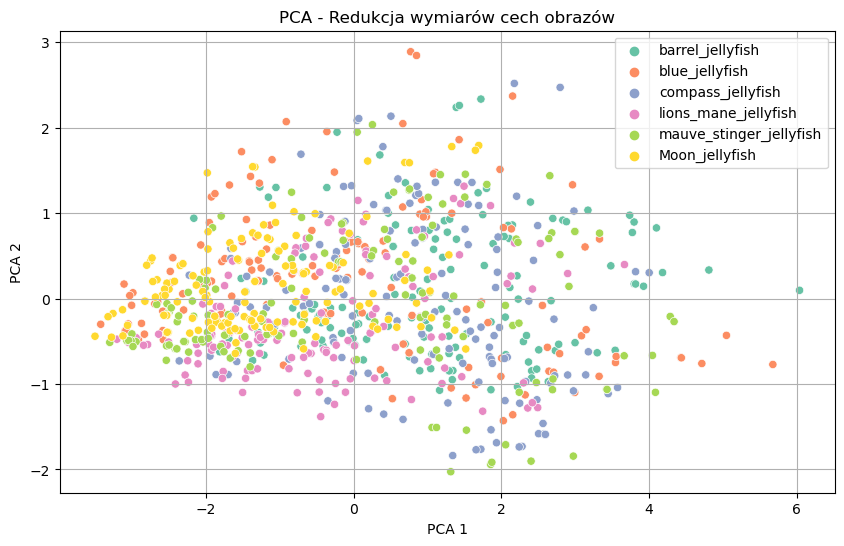

In [18]:
print("\nRedukcja wymiarowości (PCA) i wizualizacja danych...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.title("PCA - Redukcja wymiarów cech obrazów")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
"""
🧠 Czym jest PCA (Principal Component Analysis)?
PCA to metoda redukcji wymiarowości, która:

szuka nowych osi, wzdłuż których dane najbardziej się „rozciągają”,

przekształca dane do przestrzeni o mniejszej liczbie wymiarów (np. 2D),

PCA 1 to oś, która najlepiej różnicuje dane,

PCA 2 to druga, prostopadła oś z kolejną największą wariancją.

📈 Jak czytać wykres PCA:
Każdy punkt to jeden obraz meduzy (po przetworzeniu na cechy).

Pozycja punktu pokazuje, jak różni się wizualnie od innych (np. kolorem, jasnością).

Jeśli punkty tego samego gatunku są blisko siebie i daleko od innych, to znaczy, że gatunki są rozróżnialne wizualnie.

Jeśli wszystko się miesza — potrzebujemy lepszych cech
"""

In [22]:
def extract_advanced_features(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (100, 100))
    
    # Jasność (średnia w odcieniach szarości)
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    avg_brightness = gray.mean()
    
    # Rozmazanie - wariancja Laplace'a (niska = rozmazane)
    blur_value = cv2.Laplacian(gray, cv2.CV_64F).var()
    
    # Średni kolor (RGB)
    avg_color = img_resized.mean(axis=(0, 1))
    
    # Dominujący odcień (Hue) - konwersja na HSV
    hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
    avg_hue = hsv[:, :, 0].mean()
    
    return [*avg_color, avg_brightness, blur_value, avg_hue]

print("\nEkstrakcja rozszerzonych cech wizualnych...")
X_adv = []
y_adv = []

for species in species_folders:
    species_dir = os.path.join(DATA_DIR, species)
    for file in os.listdir(species_dir):
        path = os.path.join(species_dir, file)
        features = extract_advanced_features(path)
        X_adv.append(features)
        y_adv.append(species)

X_adv = np.array(X_adv)
print(f"Zebrano {X_adv.shape[0]} zestawów cech rozszerzonych (RGB, jasność, rozmazanie, hue).")



Ekstrakcja rozszerzonych cech wizualnych...
Zebrano 900 zestawów cech rozszerzonych (RGB, jasność, rozmazanie, hue).



Wizualizacja rozkładu jasności i rozmazania dla różnych gatunków...


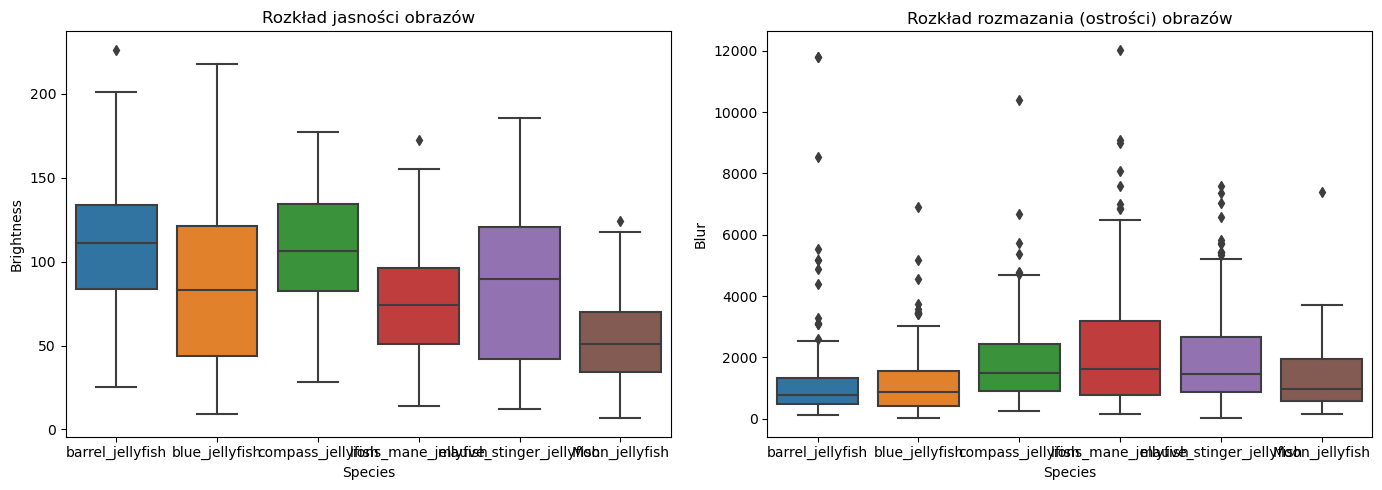

In [23]:
import pandas as pd

df = pd.DataFrame(X_adv, columns=["R", "G", "B", "Brightness", "Blur", "Hue"])
df["Species"] = y_adv

print("\nWizualizacja rozkładu jasności i rozmazania dla różnych gatunków...")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Species", y="Brightness")
plt.title("Rozkład jasności obrazów")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Species", y="Blur")
plt.title("Rozkład rozmazania (ostrości) obrazów")

plt.tight_layout()
plt.show()
